In [1]:
#Importing the Important Libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [2]:
#Loading the data frame 
insurance =pd.read_csv('insurance.csv')

In [3]:
#First five rows of the data frame
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Number of rows and columns in this data frame
insurance.shape

(1338, 7)

In [5]:
#Information about the data set
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#In this we are targeting the charges and others are the features and sex,smoker,region are catagorical features.

In [7]:
#Cheaking for the missing values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#Data Analysis 

In [9]:
#statistical measures of the dataset
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Figure size 432x432 with 0 Axes>

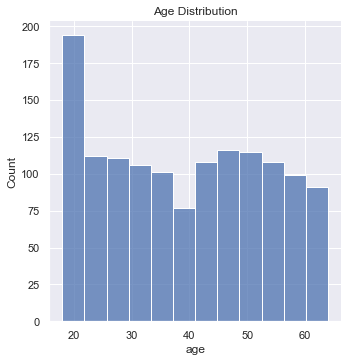

In [10]:
#Distribution of the age value 
sns.set() 
plt.figure(figsize=(6,6))
sns.displot(insurance['age']) 
plt.title('Age Distribution')
plt.show()

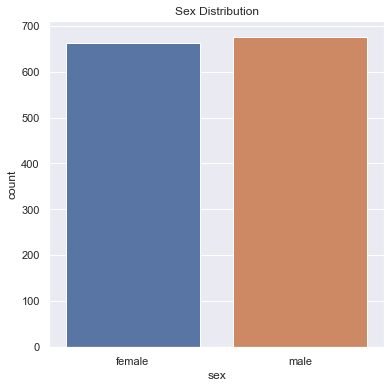

In [11]:
#Gender column (catagorical) count plot
plt.figure(figsize=(6,6))
sns.countplot(x = 'sex' , data=insurance)
plt.title('Sex Distribution')
plt.show()

In [12]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

c:\users\vaishnavi patil\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


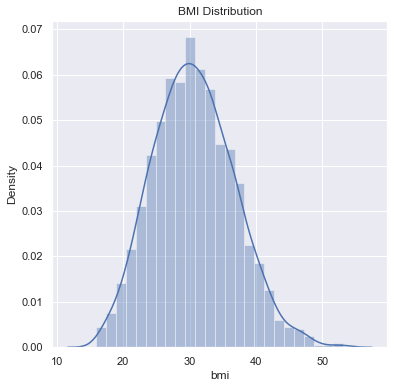

In [13]:
#Distribution of the bmi value plot

plt.figure(figsize=(6,6))
sns.distplot(insurance['bmi']) 
plt.title('BMI Distribution')
plt.show()

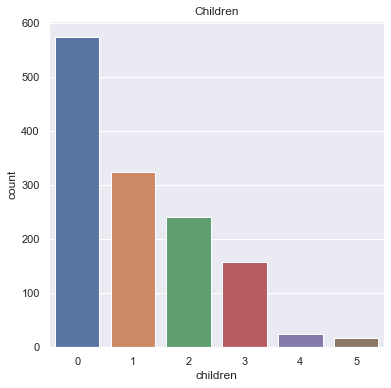

In [14]:
#Childern column count plot
plt.figure(figsize=(6,6))
sns.countplot(x = 'children', data = insurance)
plt.title('Children')
plt.show()

In [15]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

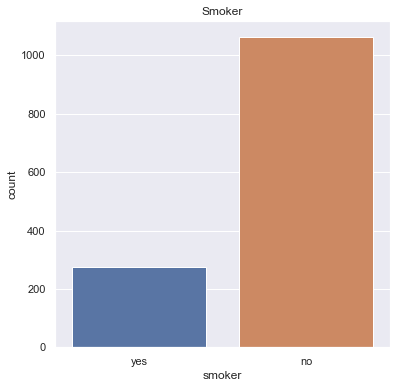

In [16]:
#Smoker Column count plot
plt.figure(figsize=(6,6))
sns.countplot(x = 'smoker', data = insurance)
plt.title('Smoker')
plt.show()

In [17]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

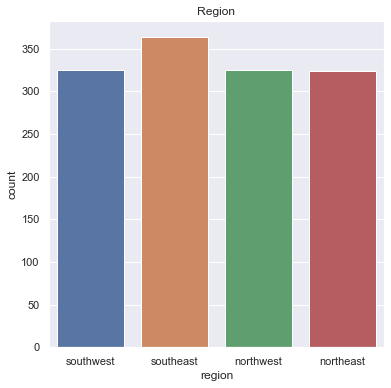

In [18]:
#Region column
plt.figure(figsize=(6,6))
sns.countplot(x = 'region', data = insurance)
plt.title('Region')
plt.show()

In [19]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

c:\users\vaishnavi patil\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


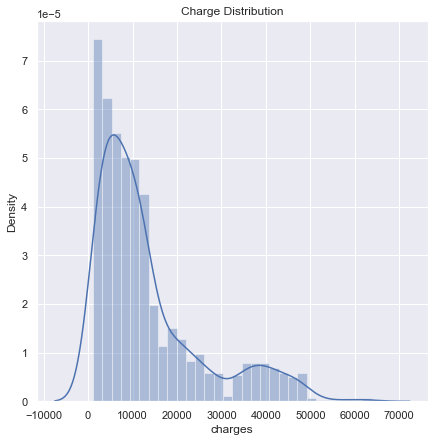

In [20]:
#Distribution of the charges value 
plt.figure(figsize=(7,7))
sns.distplot(insurance['charges']) 
plt.title('Charge Distribution')
plt.show()

Data Pre-Processing

Encoding the catagorical features

In [21]:
#Encoding the Sex Column
insurance.replace({'sex':{'male': 0, 'female': 1}}, inplace=True)

#Encoding the Smoker Column
insurance.replace({'smoker':{'yes': 0, 'no': 1}}, inplace=True)

#Encoding the Region Column
insurance.replace({'region':{'southeast': 0, 'southwest': 1, 'northeast':2, 'northwest':3}}, inplace = True)

In [22]:
#Splitting the Features and Targets 

In [23]:
X = insurance.drop(columns = 'charges', axis=1) #removing the charges from x
Y = insurance['charges'] #adding charges to y as it is our target

In [24]:
print(X) #printing the data after removing the charges.

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [25]:
print(Y) #printing the data with the charges in y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [26]:
#spliting the data into training data and testing data

In [27]:
X_train, X_test, Y_train , Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

LINEAR REGRESSION

In [29]:
#loding the linear regression model
regressor = LinearRegression()

In [30]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [31]:
#prediction on training data
training_data_prediction= regressor.predict(X_train)

In [32]:
#R squared value of train data.
from sklearn.metrics import mean_squared_error, r2_score
import math

r2_train = metrics.r2_score(Y_train, training_data_prediction)
print("R squared value is: ", r2_train)

rf_mse = mean_squared_error(Y_train, training_data_prediction)
print('MSE-Linear Regression : %.2f (square-rooted)' % math.sqrt(rf_mse))

R squared value is:  0.751505643411174
MSE-Linear Regression : 6014.56 (square-rooted)


In [33]:
#The R squared value is near to one so our model is predicting the good value of charges

In [34]:
#prediction on testing data
test_data_prediction= regressor.predict(X_test)

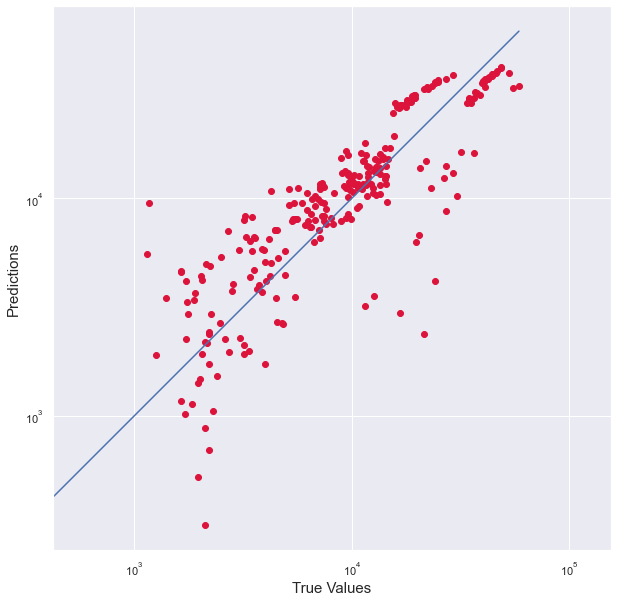

In [36]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, test_data_prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_test), max(Y_test))
p2 = min(min(test_data_prediction), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Building the Predictive System

In [37]:
#catagorical data in values:
#{'sex':{'male': 0, 'female': 1}
#{'smoker':{'yes': 0, 'no': 1}
#{'region':{'southeast': 0, 'southwest': 1, 'northeast':2, 'northwest':3}

In [38]:
input_data = (31,1,25.74,0,1,0)

#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)
print("The insurance cost is USD ", prediction[0])

[3760.0805765]
The insurance cost is USD  3760.0805764960523
